In [1]:
import numpy as np
import pandas as pd
import csv as csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import cross_validation
%matplotlib inline

In [2]:
# reads in train and test data sets

train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [3]:
train_set['Distance_To_Hydrology'] = np.sqrt(train_set.Vertical_Distance_To_Hydrology**2 + 
                                             train_set.Horizontal_Distance_To_Hydrology**2)
test_set['Distance_To_Hydrology'] = np.sqrt(test_set.Vertical_Distance_To_Hydrology**2 + 
                                            test_set.Horizontal_Distance_To_Hydrology**2)

In [4]:
ids = test_set['Id'].values
train_data = train_set.drop(['Id', 'Cover_Type', 'Aspect', 'Slope', 
                             'Hillshade_Noon', 'Hillshade_3pm'], axis = 1)
test_data = test_set.drop(['Id', 'Aspect', 'Slope', 
                           'Hillshade_Noon', 'Hillshade_3pm'], axis = 1)
target_data = train_set.Cover_Type.values

In [5]:
train_values = train_data.values
test_values = test_data.values

In [6]:
rf = ExtraTreesClassifier(n_estimators=500, criterion = 'entropy')
rf = rf.fit(train_values, target_data)

In [7]:
output = rf.predict(test_values).astype(int)

In [8]:
predictions_file = open("forest_cover_prediction.csv", "w")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(['Id', 'Cover_Type'])
open_file_object.writerows(zip(ids, output))
predictions_file.close()
print('Done.')

Done.


In [9]:
prediction = pd.read_csv('forest_cover_prediction.csv')
prediction.Cover_Type.describe()

count    565892.000000
mean          2.308465
std           1.695648
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: Cover_Type, dtype: float64

In [10]:
importance = pd.DataFrame(rf.feature_importances_, train_data.columns)
importance.sort([0], ascending = False)[:10]

,0
Elevation,0.206431
Wilderness_Area4,0.109772
Horizontal_Distance_To_Roadways,0.088099
Horizontal_Distance_To_Fire_Points,0.071066
Hillshade_9am,0.056024
Distance_To_Hydrology,0.052110
Horizontal_Distance_To_Hydrology,0.049707
Vertical_Distance_To_Hydrology,0.047779
Wilderness_Area1,0.036867
Soil_Type10,0.035604


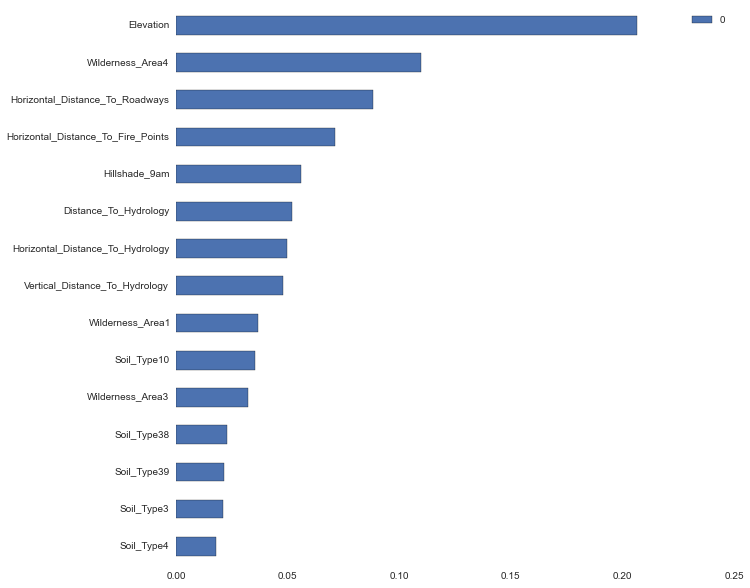

In [11]:
importance.sort([0], ascending = True)[len(importance)-15:].plot(figsize = (10,10), kind = 'barh')